In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head()

,Date,UTC,Status,Latitude,Longitude,MSWS,MinCentralPressure,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20
0,18520826,600,HU,30.2N,88.6W,100,961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,18530903,1200,HU,19.7N,56.2W,130,924,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,18540907,1200,HU,28.0N,78.6W,110,938,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,18540908,1800,HU,31.6N,81.1W,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,18540908,2000,HU,31.7N,81.1W,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
len(data)

38489

In [5]:
data['Date']

0        18520826
1        18530903
2        18540907
3        18540908
4        18540908
           ...   
38484    20201120
38485    20201120
38486    20201120
38487    20201120
38488    20201121
Name: Date, Length: 38489, dtype: int64

In [6]:
#Converting Date to readable format
data['Date']=pd.to_datetime(data['Date'] , format='%Y%m%d')

In [7]:
data.head()

,Date,UTC,Status,Latitude,Longitude,MSWS,MinCentralPressure,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20
0,1852-08-26,600,HU,30.2N,88.6W,100,961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,1853-09-03,1200,HU,19.7N,56.2W,130,924,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,1854-09-07,1200,HU,28.0N,78.6W,110,938,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,1854-09-08,1800,HU,31.6N,81.1W,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,1854-09-08,2000,HU,31.7N,81.1W,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [8]:
#Extracting Year and month from Date

In [9]:
data['Year']=data['Date'].apply(lambda date:date.year)
data['Month']=data['Date'].apply(lambda date:date.month)
data.drop(['Date'],axis=1,inplace=True)

In [10]:
data.head()

,UTC,Status,Latitude,Longitude,MSWS,MinCentralPressure,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Year,Month
0,600,HU,30.2N,88.6W,100,961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1852,8
1,1200,HU,19.7N,56.2W,130,924,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1853,9
2,1200,HU,28.0N,78.6W,110,938,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854,9
3,1800,HU,31.6N,81.1W,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854,9
4,2000,HU,31.7N,81.1W,100,950,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1854,9


In [11]:
#Adding hemisphere column ( N,E- > 0 S,W-> 1)

In [12]:
def Convhemisphere(coord):
        hemisphere = re.findall(r'[NSWE]' , coord)[0]
        if hemisphere == 'N' or hemisphere == 'E':
            return 0
        else:
            return 1

In [13]:
data['Latitude_Hemisphere'] = data['Latitude'].apply(Convhemisphere)
data['Longitude_Hemisphere'] = data['Longitude'].apply(Convhemisphere)
data['Latitude_Hemisphere'] = data['Latitude_Hemisphere'].astype('category')
data['Longitude_Hemisphere'] = data['Longitude_Hemisphere'].astype('category')

In [14]:
data.head()

,UTC,Status,Latitude,Longitude,MSWS,MinCentralPressure,Column9,Column10,Column11,Column12,...,Column15,Column16,Column17,Column18,Column19,Column20,Year,Month,Latitude_Hemisphere,Longitude_Hemisphere
0,600,HU,30.2N,88.6W,100,961,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,1852,8,0,1
1,1200,HU,19.7N,56.2W,130,924,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,1853,9,0,1
2,1200,HU,28.0N,78.6W,110,938,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,1854,9,0,1
3,1800,HU,31.6N,81.1W,100,950,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,1854,9,0,1
4,2000,HU,31.7N,81.1W,100,950,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,1854,9,0,1


In [15]:
#Converting Latitude to numerical type

In [16]:
def ConvNum(coord):
        num = coord.translate({ ord(c): None for c in "NSEW" })
        return num

In [17]:
ConvNum(data['Latitude'][10])

' 42.5'

In [18]:
data['Latitude'][10].translate({ ord(c): None for c in "NS" })

' 42.5'

In [19]:
data['Latitude_num'] =  data['Latitude'].apply(ConvNum)
data['Longitude_num'] =   data['Longitude'].apply(ConvNum)

In [20]:
data.head()

,UTC,Status,Latitude,Longitude,MSWS,MinCentralPressure,Column9,Column10,Column11,Column12,...,Column17,Column18,Column19,Column20,Year,Month,Latitude_Hemisphere,Longitude_Hemisphere,Latitude_num,Longitude_num
0,600,HU,30.2N,88.6W,100,961,-999,-999,-999,-999,...,-999,-999,-999,-999,1852,8,0,1,30.2,88.6
1,1200,HU,19.7N,56.2W,130,924,-999,-999,-999,-999,...,-999,-999,-999,-999,1853,9,0,1,19.7,56.2
2,1200,HU,28.0N,78.6W,110,938,-999,-999,-999,-999,...,-999,-999,-999,-999,1854,9,0,1,28.0,78.6
3,1800,HU,31.6N,81.1W,100,950,-999,-999,-999,-999,...,-999,-999,-999,-999,1854,9,0,1,31.6,81.1
4,2000,HU,31.7N,81.1W,100,950,-999,-999,-999,-999,...,-999,-999,-999,-999,1854,9,0,1,31.7,81.1


In [21]:
#Dropping latitude and longitude

In [22]:
data.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [23]:
data.head()

,UTC,Status,MSWS,MinCentralPressure,Column9,Column10,Column11,Column12,Column13,Column14,...,Column17,Column18,Column19,Column20,Year,Month,Latitude_Hemisphere,Longitude_Hemisphere,Latitude_num,Longitude_num
0,600,HU,100,961,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,1852,8,0,1,30.2,88.6
1,1200,HU,130,924,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,1853,9,0,1,19.7,56.2
2,1200,HU,110,938,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,1854,9,0,1,28.0,78.6
3,1800,HU,100,950,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,1854,9,0,1,31.6,81.1
4,2000,HU,100,950,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,1854,9,0,1,31.7,81.1


In [24]:
#Dropping columns with null

In [25]:
drop=['Column9','Column10','Column11','Column12','Column13','Column14','Column15','Column16','Column17','Column18','Column19','Column20']

In [26]:
data.drop(drop,axis=1,inplace=True)

In [27]:
data.head()

,UTC,Status,MSWS,MinCentralPressure,Year,Month,Latitude_Hemisphere,Longitude_Hemisphere,Latitude_num,Longitude_num
0,600,HU,100,961,1852,8,0,1,30.2,88.6
1,1200,HU,130,924,1853,9,0,1,19.7,56.2
2,1200,HU,110,938,1854,9,0,1,28.0,78.6
3,1800,HU,100,950,1854,9,0,1,31.6,81.1
4,2000,HU,100,950,1854,9,0,1,31.7,81.1


In [28]:
len(data)

38489

In [29]:
data_dup=data.copy()

In [30]:
data

,UTC,Status,MSWS,MinCentralPressure,Year,Month,Latitude_Hemisphere,Longitude_Hemisphere,Latitude_num,Longitude_num
0,600,HU,100,961,1852,8,0,1,30.2,88.6
1,1200,HU,130,924,1853,9,0,1,19.7,56.2
2,1200,HU,110,938,1854,9,0,1,28.0,78.6
3,1800,HU,100,950,1854,9,0,1,31.6,81.1
4,2000,HU,100,950,1854,9,0,1,31.7,81.1
...,...,...,...,...,...,...,...,...,...,...
38484,0,LO,30,1008,2020,11,0,1,16.8,121.7
38485,600,LO,30,1008,2020,11,0,1,16.7,122.6
38486,1200,LO,30,1009,2020,11,0,1,16.7,123.7
38487,1800,LO,25,1010,2020,11,0,1,16.6,124.8


In [31]:
Y=data['Status']

In [32]:
X=data
X.drop(['Status'],axis=1,inplace=True)

In [33]:
X.head()


,UTC,MSWS,MinCentralPressure,Year,Month,Latitude_Hemisphere,Longitude_Hemisphere,Latitude_num,Longitude_num
0,600,100,961,1852,8,0,1,30.2,88.6
1,1200,130,924,1853,9,0,1,19.7,56.2
2,1200,110,938,1854,9,0,1,28.0,78.6
3,1800,100,950,1854,9,0,1,31.6,81.1
4,2000,100,950,1854,9,0,1,31.7,81.1


In [34]:
Y.head()

0     HU
1     HU
2     HU
3     HU
4     HU
Name: Status, dtype: object

In [35]:
Y.shape

(38489,)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 

C:\Users\niyan\anaconda3\envs\cv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [37]:
model=RandomForestClassifier(n_estimators=500)
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
#Feature selection

In [39]:
features = pd.Series(model.feature_importances_ , index= X.columns).sort_values(ascending=False)

In [40]:
print(features)

MSWS                    0.493051
MinCentralPressure      0.202800
Latitude_num            0.107308
Year                    0.081522
Longitude_num           0.072753
Month                   0.029048
UTC                     0.009756
Longitude_Hemisphere    0.003762
Latitude_Hemisphere     0.000000
dtype: float64


In [41]:
#Now we choose the top 5 features 

In [42]:
data_dup

,UTC,Status,MSWS,MinCentralPressure,Year,Month,Latitude_Hemisphere,Longitude_Hemisphere,Latitude_num,Longitude_num
0,600,HU,100,961,1852,8,0,1,30.2,88.6
1,1200,HU,130,924,1853,9,0,1,19.7,56.2
2,1200,HU,110,938,1854,9,0,1,28.0,78.6
3,1800,HU,100,950,1854,9,0,1,31.6,81.1
4,2000,HU,100,950,1854,9,0,1,31.7,81.1
...,...,...,...,...,...,...,...,...,...,...
38484,0,LO,30,1008,2020,11,0,1,16.8,121.7
38485,600,LO,30,1008,2020,11,0,1,16.7,122.6
38486,1200,LO,30,1009,2020,11,0,1,16.7,123.7
38487,1800,LO,25,1010,2020,11,0,1,16.6,124.8


In [43]:
data_selected=data_dup[['MSWS','MinCentralPressure','Latitude_num','Year','Longitude_num','Status']]

In [44]:
data_selected.head()

,MSWS,MinCentralPressure,Latitude_num,Year,Longitude_num,Status
0,100,961,30.2,1852,88.6,HU
1,130,924,19.7,1853,56.2,HU
2,110,938,28.0,1854,78.6,HU
3,100,950,31.6,1854,81.1,HU
4,100,950,31.7,1854,81.1,HU


In [45]:
Y=data_selected['Status']
X=data_selected
X.drop(['Status'],axis=1,inplace=True)

C:\Users\niyan\anaconda3\envs\cv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
#Split test and train

In [47]:
X_train , X_test , Y_train, Y_test  = train_test_split(X,Y, test_size=0.1, random_state=32)

In [48]:
X_train

,MSWS,MinCentralPressure,Latitude_num,Year,Longitude_num
37675,35,1005,16.9,2019,160.5
9065,40,994,46.0,1996,44.0
20413,25,1013,24.6,2019,77.4
22721,55,994,14.1,1990,119.9
24587,20,1012,20.6,1992,107.6
...,...,...,...,...,...
19527,75,982,21.5,2017,95.0
24828,40,1003,29.7,1993,154.0
20414,25,1013,25.0,2019,78.4
9526,30,1009,13.0,1997,54.0


In [49]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
model=RandomForestClassifier(n_estimators= 1800,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 20,
 bootstrap= False)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
prediction=model.predict(X_test)
print(np.array(Y_test))

[' TS' ' TD' ' TD' ... ' EX' ' TD' ' HU']


In [53]:
X_test

array([[ 0.1745114 ,  0.02412219, -1.11577736,  0.19253097,  0.53401927],
       [-0.76476573,  0.66532379, -1.05356645,  0.41163926,  0.61274919],
       [-0.76476573,  0.66532379, -1.11577736,  1.12374119,  1.40848376],
       ...,
       [ 0.1745114 , -0.08274475,  1.23786866, -1.28644997, -1.53826475],
       [-0.76476573,  0.66532379, -0.64919555,  0.5211934 ,  0.62399632],
       [ 1.48949938, -1.20484756,  1.66297653, -0.35523975, -0.57101142]])

In [55]:
model.predict(sc.transform([[60,982,36.8,2017,70]]))

array([' TS'], dtype=object)

In [52]:
cm = confusion_matrix(Y_test, prediction)
print(cm)
print(accuracy_score(Y_test, prediction))
print(precision_score(Y_test, prediction,average="macro"))
print(recall_score(Y_test, prediction,average="macro"))
print(f1_score(Y_test, prediction,average="macro"))

[[  33    0    0    3    0    0    0    1    1    0    0]
 [   0  190    8    4    1    1    0    9   27    0    0]
 [   0    1 1001    0    0    0    0    0    0    0    0]
 [   0    5    0  363    0    0    0   34    5    0    0]
 [   0    0    0    1   12    0    0   10    0    0    0]
 [   0    1    0    0    0   34    0    0   22    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0]
 [   2    6    0   34    1    0    0  706    0    0    0]
 [   0   13    0    5    0    1    0    0 1302    0    0]
 [   0    0    0    0    0    0    0    0    0    4    0]
 [   0    0    0    0    0    0    0    0    1    0    6]]
0.9488178747726682
0.9444746855028711
0.8595056272597293
0.8938378449077026


In [53]:
features=np.unique(Y_test)
print(features)

[' DB' ' EX' ' HU' ' LO' ' SD' ' SS' ' ST' ' TD' ' TS' ' TY' ' WV']


In [55]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig("confusionmatrix.jpg")
    plt.show()

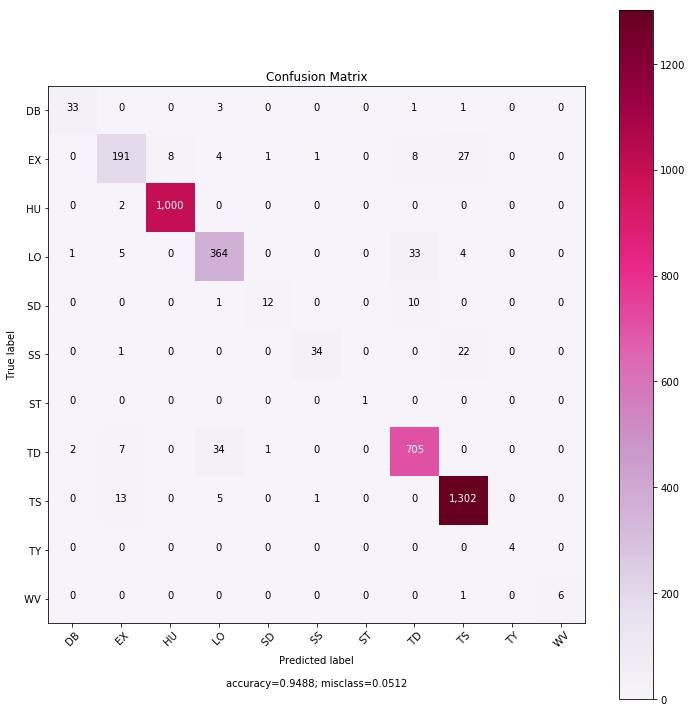

In [56]:
plot_confusion_matrix(cm=cm,target_names=features,normalize=False,title="Confusion Matrix",cmap="PuRd")

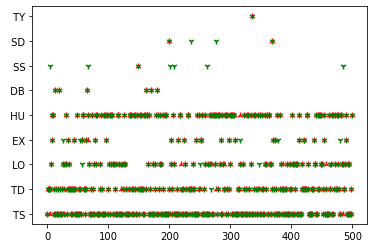

In [58]:
plt.scatter(range(len(prediction[:500])),prediction[:500],color='r',marker='2')
plt.scatter(range(len(Y_test[:500])),Y_test[:500],color='g',marker="1")
plt.savefig("both_500_samples.jpg")
plt.show()

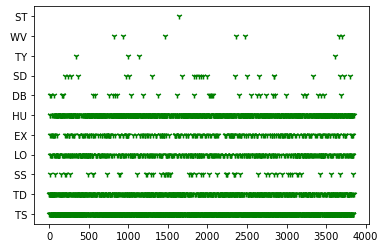

In [59]:
plt.scatter(range(len(Y_test)),Y_test,color='g',marker="1")
plt.savefig("origina.jpg")

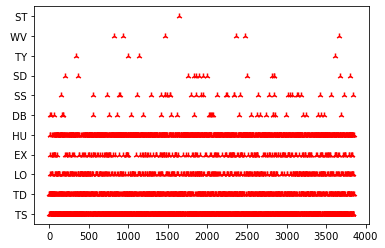

In [60]:
plt.scatter(range(len(prediction)),prediction,color='r',marker='2')
plt.savefig("predicted.jpg")

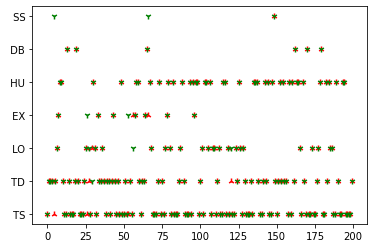

In [61]:
plt.scatter(range(len(prediction[:200])),prediction[:200],color='r',marker='2')
plt.scatter(range(len(Y_test[:200])),Y_test[:200],color='g',marker="1")
plt.savefig("both_200_samples.jpg")
plt.show()

In [ ]:
#Following code is used to find the best hyperparameters for the model.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, Y_train)

In [57]:
# rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}